<a href="https://colab.research.google.com/github/natalia-kurbakova/Baruch-Data-Challenge/blob/main/add_to_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [96]:
#loading data
train = pd.read_csv("train updated 04132022.csv")

#set option to display columns and rows of the dataframe fully
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [97]:
#creatig a dataframe
train = pd.DataFrame(train)

In [98]:
train['charging_rate_lag4'] = train['charging_rate_lag4'].abs()
train['discharging_rate_lag4'] = train['discharging_rate_lag4'].abs()
train['discharging_rate_lag3'] = train['discharging_rate_lag3'].abs()
train['charging_rate_lag3'] = train['charging_rate_lag3'].abs()

# VIZUALIZATION

In [99]:
#changing the datetime format in Date Deployed --- adding dashes to date!
train['Date Deployed'] = pd.to_datetime(train['Date Deployed']).dt.strftime('%Y-%m-%d')
years=[]
months=[]

for dates in train['Date Deployed']:
    dates[1].lstrip('0')
    dates = dates.split("-")
    year = int(dates[0])
    month = int(dates[1])
    years.append(year)
    months.append(month)

train['Year Deployed'] = years
train['Month Deployed'] = months

In [100]:
#    train = train.sort_values('Date Deployed', ascending=True)

In [101]:
train['delta_discharging_rate'] = (train['discharging_rate_lag3'] - train['discharging_rate_lag4'])/train['discharging_rate_lag4']

In [102]:
train['delta_charging_rate'] = (train['charging_rate_lag3'] - train['charging_rate_lag4'])/train['charging_rate_lag4']

In [103]:
#devices that failed
failed_true = train[train['fail_7']==1]

In [104]:
fail_7_count = failed_true.count().max()
fail_7_count

9401

In [105]:
#devices that didn't fail yest - same size as failed_true
failed_false = train[train['fail_7']==0].sample(n=fail_7_count)

In [106]:
df_different_size = pd.concat([failed_true,failed_false], ignore_index=True)

In [107]:
custom_palette1 = ['#FF6900','#00D084']
custom_palette2 = ['#FCB900','#0693E3']

**for failed devices, the discharging rate decreases from 4 to 3 days pior to april first - see two plots below**

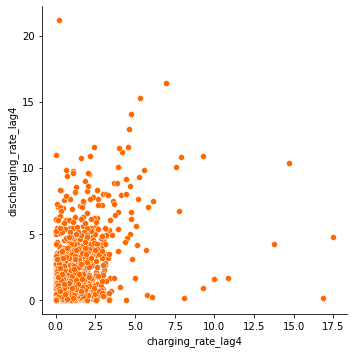

In [118]:
sns.set_palette(custom_palette1)
sns.relplot(data=failed_true, x='charging_rate_lag4', y='discharging_rate_lag4', kind='scatter')
plt.show()

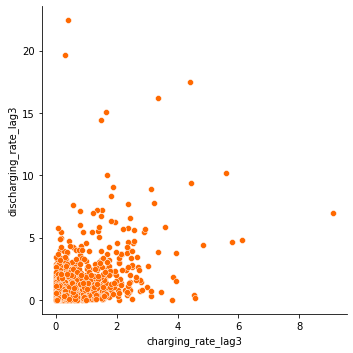

In [119]:
sns.relplot(data=failed_true, x='charging_rate_lag3', y='discharging_rate_lag3', kind='scatter')
plt.show()

**the difference in the charging and discharging rate from 4 to 3 days prior to april first is greater with devices that didn't fail yet - charging rate up to 1000 with discharging rate delta up to 2000. devices that did fail experience less fluctuations is (dis-)charging rate difference.**

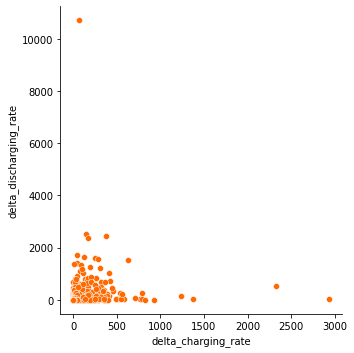

In [121]:
sns.relplot(data=failed_false, x='delta_charging_rate', y='delta_discharging_rate', kind='scatter')
plt.show()

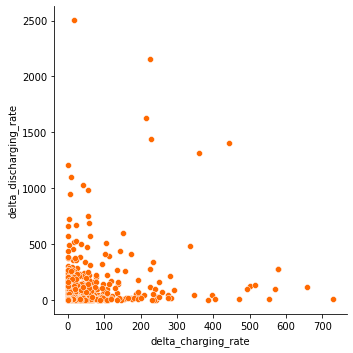

In [120]:
sns.relplot(data=failed_true, x='delta_charging_rate', y='delta_discharging_rate', kind='scatter')
plt.show()

**names of new dataframes: train (-added two columns showing differences between charging and discharging rates for lag4-lag 3, added month deployed column, modified datetime format), df_different_size**

## Additional: attempting to handle datetime format and columns - still not considered by model

In [111]:
#creating lists of columns we want to drop
cols_avg_time_charging = []
cols_avg_time_discharging = []
for i in range(5,15): 
    col_charging = "avg_time_charging_lag" + str(i)
    cols_avg_time_charging.append(col_charging)
    col_discharging = "avg_time_discharging_lag" + str(i)
    cols_avg_time_discharging.append(col_discharging)

cols_charging_rate = []
for i in range(5,8):
    col_charging_rate = "charging_rate_lag" + str(i)
    cols_charging_rate.append(col_charging_rate)

cols_discharging_rate = []    
for i in range(5,9):
    col_discharging_rate = "discharging_rate_lag" + str(i)
    cols_discharging_rate.append(col_discharging_rate)

#combining them into one list
list_of_field_names_with_nan = []
list_of_field_names_with_nan.extend(cols_discharging_rate)
list_of_field_names_with_nan.extend(cols_charging_rate)
list_of_field_names_with_nan.extend(cols_avg_time_discharging)
list_of_field_names_with_nan.extend(cols_avg_time_charging)


#modifying the dataframe by dropping the said columns
train = train.drop(columns=list_of_field_names_with_nan)

In [112]:


#creating new dataframe with reordered columns for better data understanding
new_df = train.reindex(columns=['deviceid', 'avg_volt_change_charging', 'avg_volt_change_discharging', 'max_voltage_day', 
                                'fail_7', 'charge_cycle_time_below_12', 'Date Deployed', 'Month Deployed' 
                                'avg_time_charging_lag4', 'avg_time_charging_lag3', 'avg_time_charging_lag2', 'avg_time_charging_lag1', 
                                'avg_time_discharging_lag4', 'avg_time_discharging_lag3', 'avg_time_discharging_lag2', 'avg_time_discharging_lag1', 
                                'charging_rate_lag4', 'charging_rate_lag3', 
                                'discharging_rate_lag4', 'discharging_rate_lag3',
                                'avg_time_charging', 'avg_time_discharging', 'cycle_time', 'chargecycles', 'dischargecycles', 'piececount', 'total_off_time', 'number_times_restart'])

In [113]:
#changing the datetime format in Date Deployed --- adding dashes to date!
train['Date Deployed'] = pd.to_datetime(train['Date Deployed']).dt.strftime('%Y-%m-%d')
years=[]
months=[]

for dates in train['Date Deployed']:
    dates[1].lstrip('0')
    dates = dates.split("-")
    year = int(dates[0])
    month = int(dates[1])
    years.append(year)
    months.append(month)

train['Year Deployed'] = years
train['Month Deployed'] = months